# Поиск структуры в данных
Кластеризацию можно применить и к задачам с разметкой. Она позволит увидеть в данных структуру и понять, какие признаки важнее.

Рассмотрим новую задачу. Перед вами данные от автопроизводителей. Нужно их исследовать и разделить модели автомобилей на кластеры.

## Описание данных
Каждый объект в наборе данных — это характеристики модели автомобиля:
mpg — потребление топлива (сколько миль проедет ваша машина на галлоне топлива),
- ```cylinders``` — количество цилиндров,
- ```cubicinches``` — объём двигателя (кубические дюймы),
- ```hp``` — мощность двигателя (лошадиные силы),
- ```weightlbs``` — вес автомобиля (фунты),
- ```time-to-60``` — время разгона до 60 миль/час,
- ```year``` — год выпуска,
- ```brand``` — страна-производитель автомобиля.

В датасете известен целевой признак, по которому модели автомобилей делятся по кластерам. Это столбец brand, который принимает значения: [' US.', ' Europe.', ' Japan.']. Распределение автомобилей по странам выглядит так:



In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [25]:
data = pd.read_csv('/Users/yuliabezginova/PycharmProjects/unsupervised_learning/cars.csv')

## Elbow Method

### 1) Постройте график метода локтя для количества кластеров от 1 до 10. При обучении модели примените параметр random_state=12345. 
Составьте список distortion значений целевой функции для количества кластеров от 1 до 10. При этом используйте параметр random_state=12345.
Для полученных значений целевой функции постройте график метода локтя размером 12 на 8. Ось X назовите «Число кластеров», а ось Y — «Значение целевой функции».

In [26]:
distortion = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(data)
    distortion.append(model.inertia_)

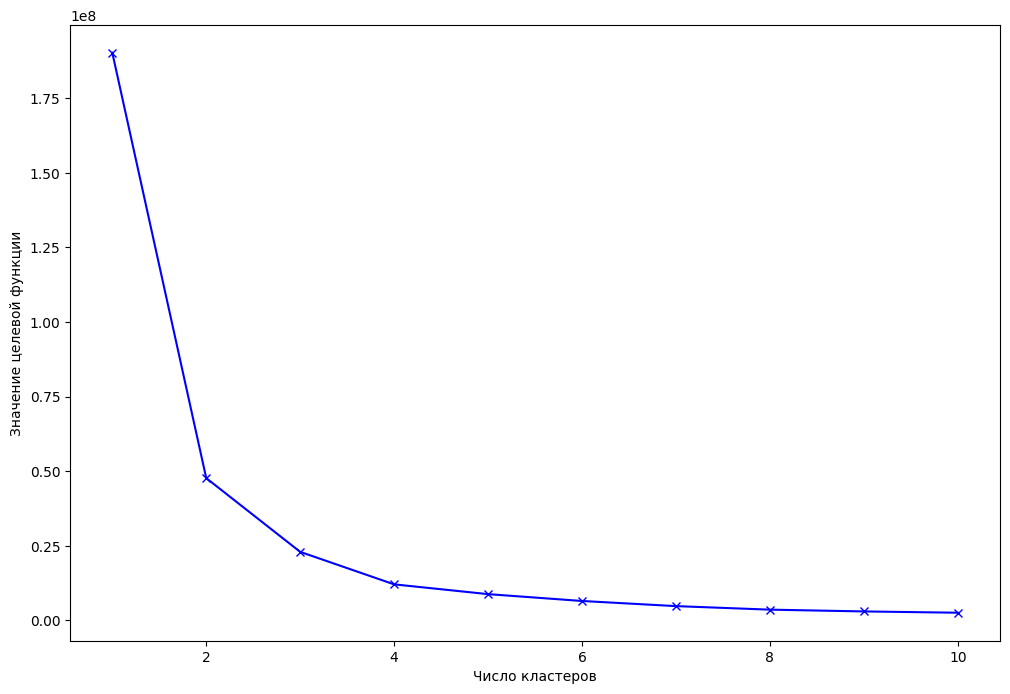

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show();

### Оптимальное число кластеров - от 2 до 4. Это не противоречит трем значениям столбца ```brand```. Посмотрим, какие три кластера выделит алгоритм k-средних.

### 2) Постройте диаграмму pairplot для модели с тремя кластерами без отмеченных центроидов. При обучении модели примените параметр random_state=12345. 
Из-за особенностей версий seaborn нужно указать список признаков в функции pairplot(): vars=data.columns[:-1]. Последний признак — это номер кластера, его отображать не надо.

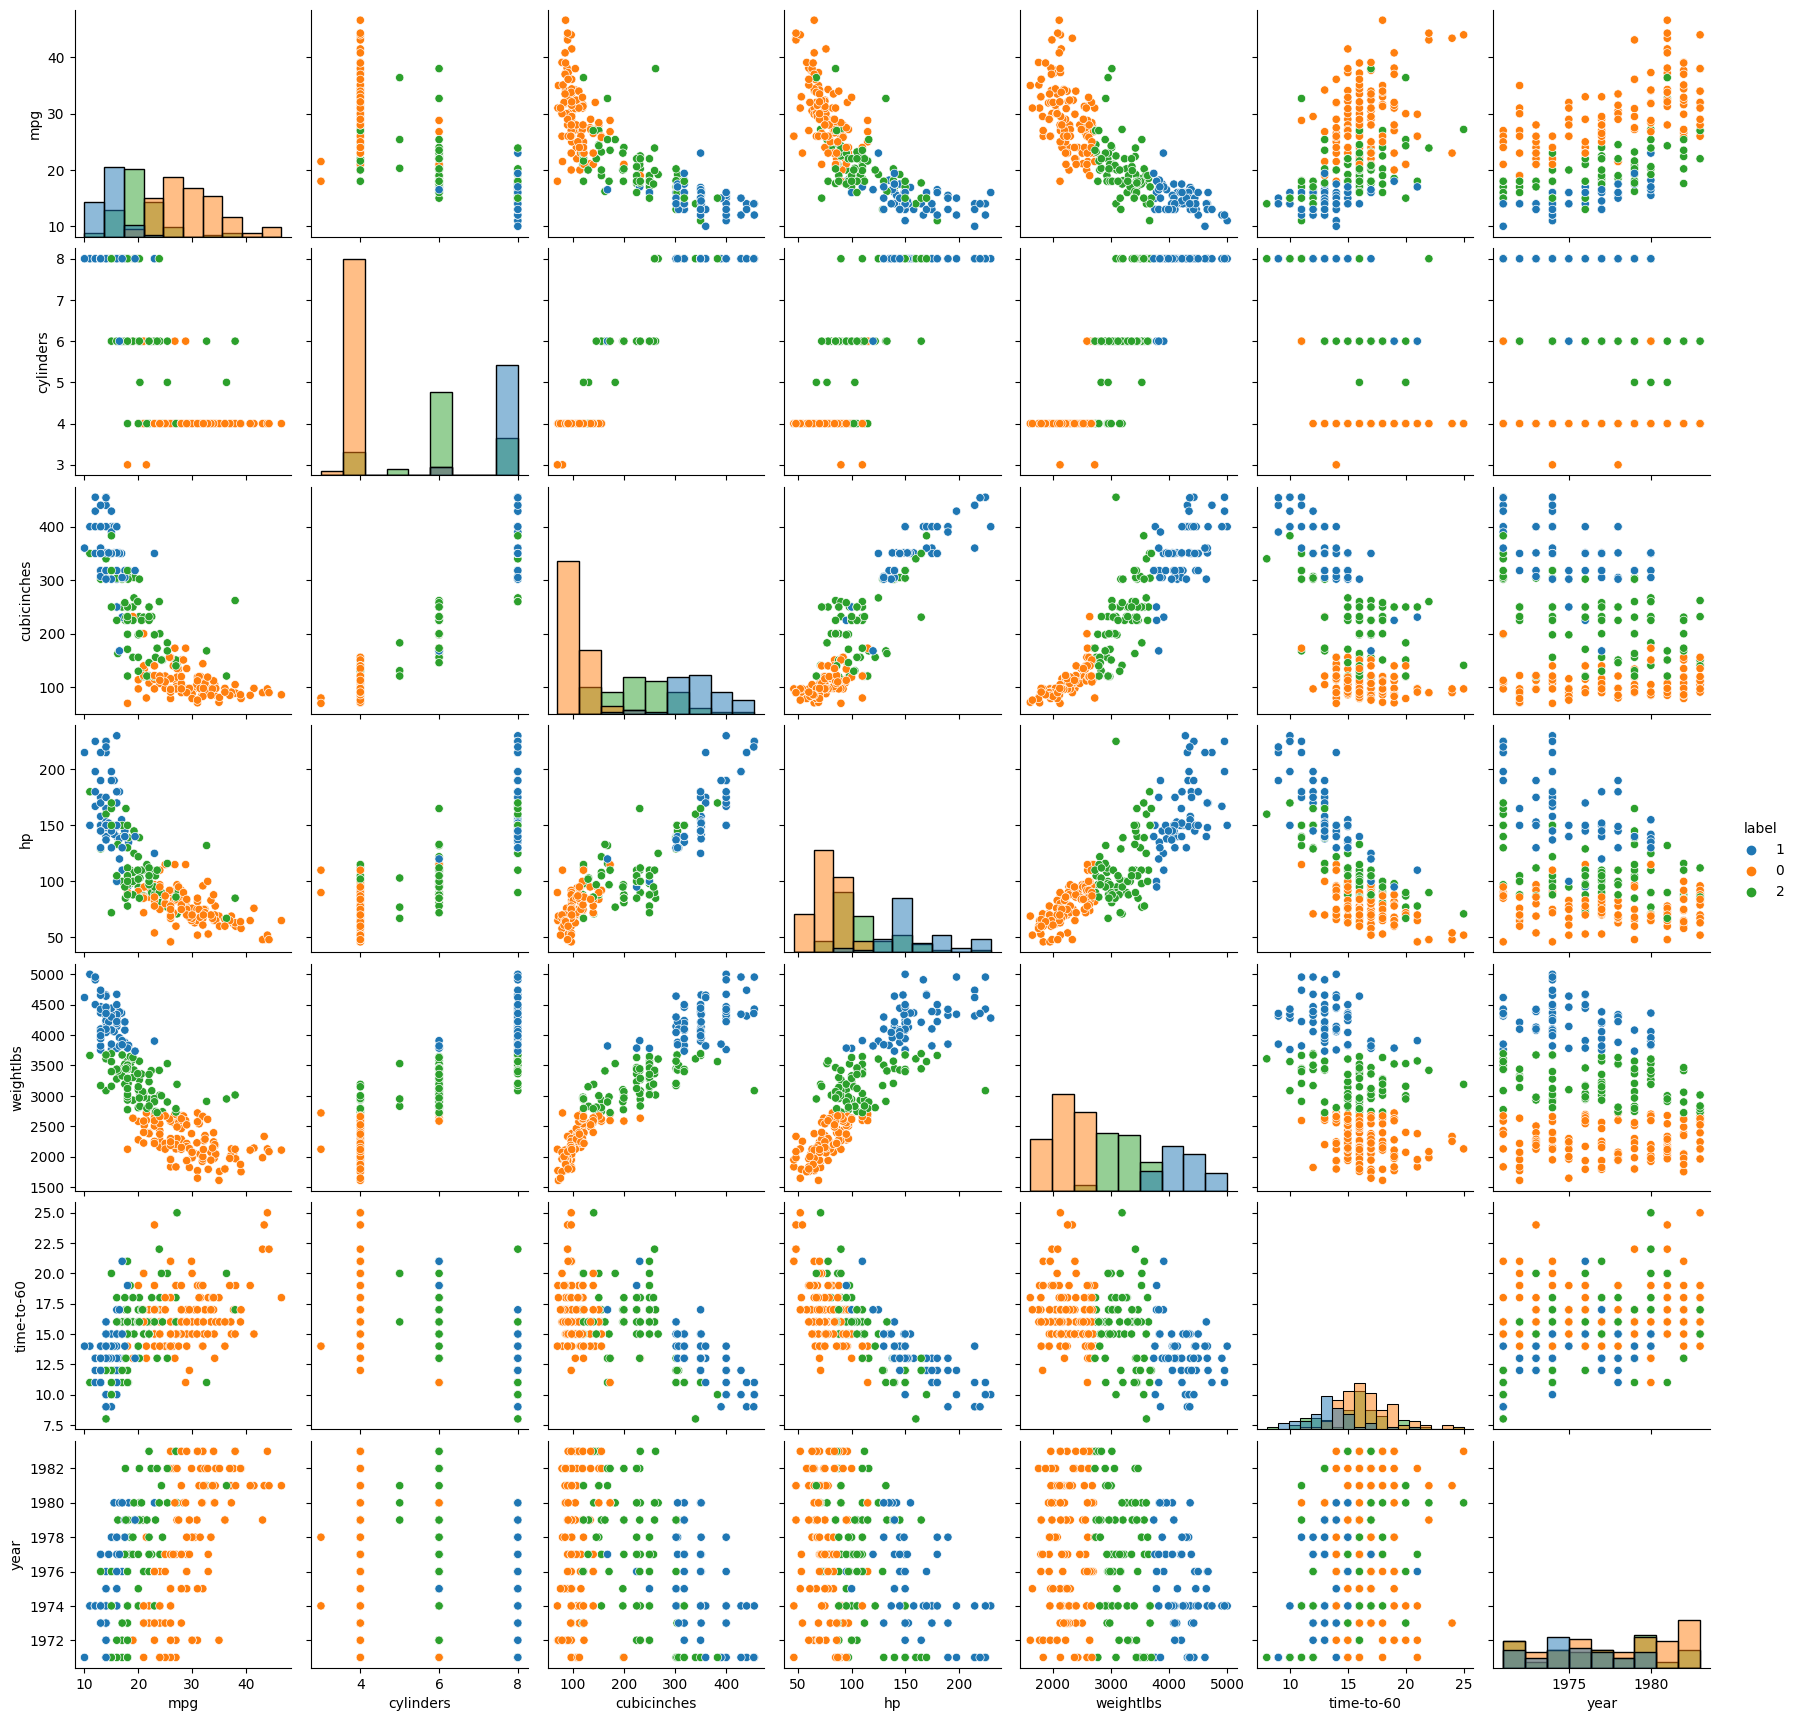

In [28]:
data = pd.read_csv('/Users/yuliabezginova/PycharmProjects/unsupervised_learning/cars.csv')

model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

# Добавление столбца с номером кластера
data['label'] = model.labels_.astype(str)

# Построение графика
sns.pairplot(data, hue='label', diag_kind='hist', vars=data.columns[:-1]);

### Новые инсайты в данных.

#### 1) Распределения для трех кластеров стали более похожими, чем по странам-производителям. Количество точек в каждом кластере примерно одинаковое.

#### 2) Скопления объектов для количества цилиндров оказались в разных кластерах: на них повлияли другие признаки.

#### 3) Столбцы ```time-to-60``` и ```year``` подтвердили свою бесполезность.

Осталось добавить полученные центроиды к заливке по стране.

### 3) Постройте диаграмму pairplot с заливкой по столбцу brand. Обучите модель с тремя кластерами на данных без столбца brand. Добавьте на график полученные центроиды. При обучении модели примените параметр random_state=12345.

Примените вызов sns.pairplot(data_full, hue='brand', diag_kind='hist') к графику с целевым признаком. Не забудьте создать дополнительный столбец и передать ему значение.

In [29]:
data_full = pd.read_csv('/Users/yuliabezginova/PycharmProjects/unsupervised_learning/cars_label.csv')
data_full.head()

mpg  cylinders  cubicinches     hp  weightlbs  time-to-60    year  \
0  14.0        8.0          350  165.0       4209        12.0  1972.0   
1  31.9        4.0           89   71.0       1925        14.0  1980.0   
2  17.0        8.0          302  140.0       3449        11.0  1971.0   
3  15.0        8.0          400  150.0       3761        10.0  1971.0   
4  30.5        4.0           98   63.0       2051        17.0  1978.0   

      brand  
0       US.  
1   Europe.  
2       US.  
3       US.  
4       US.

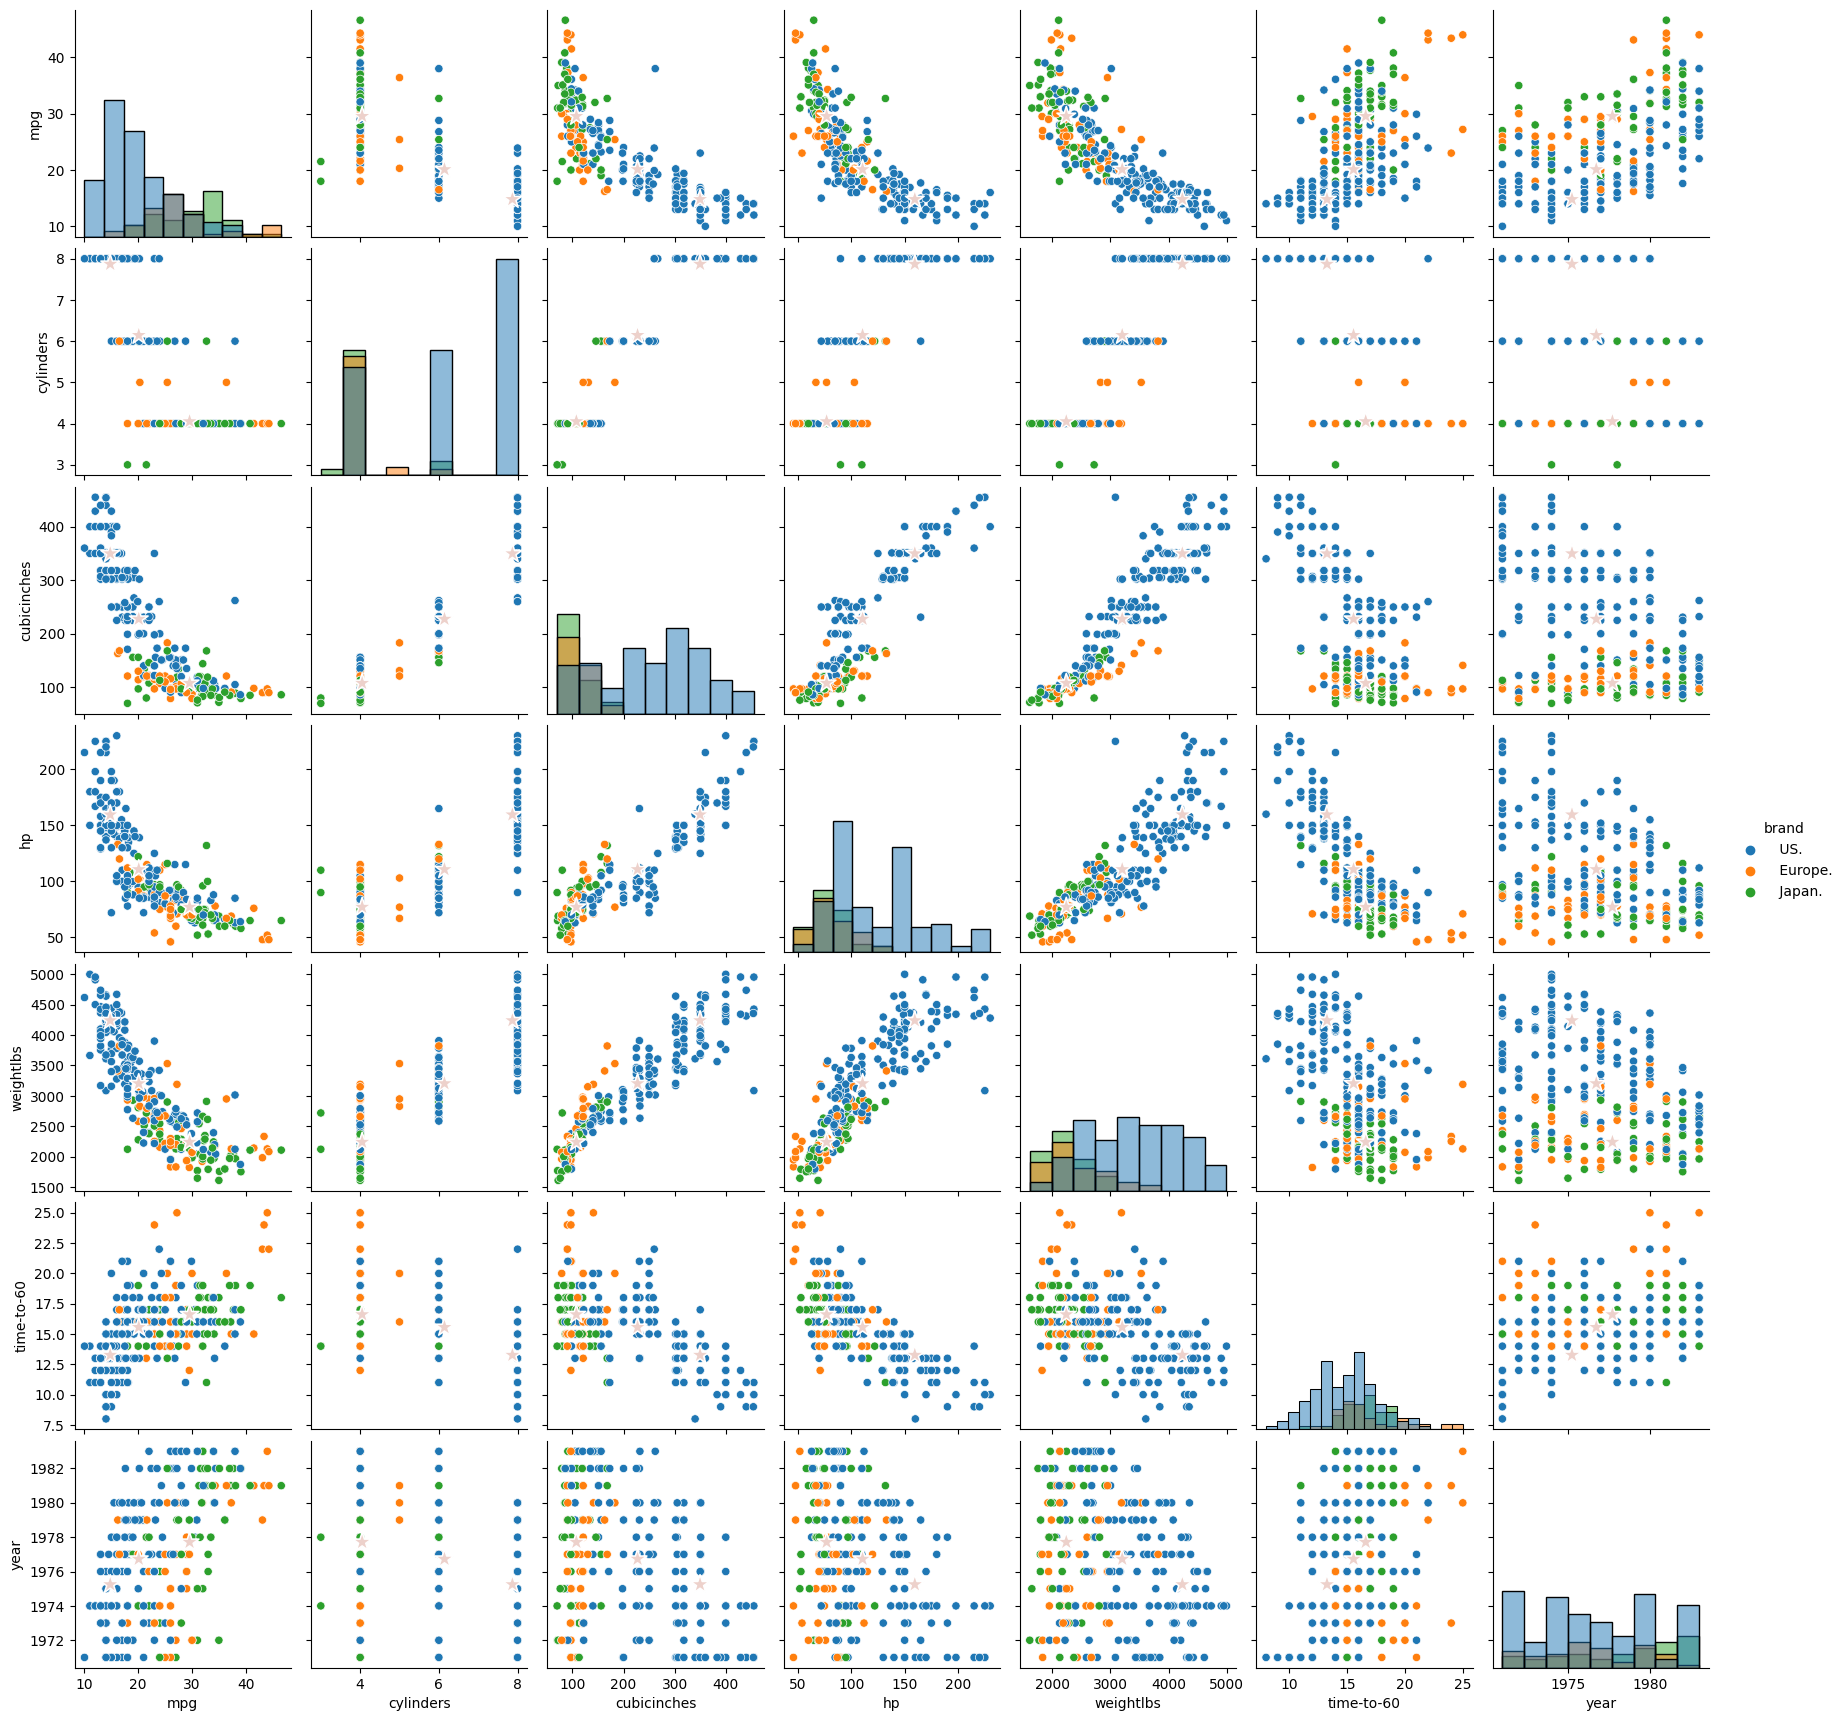

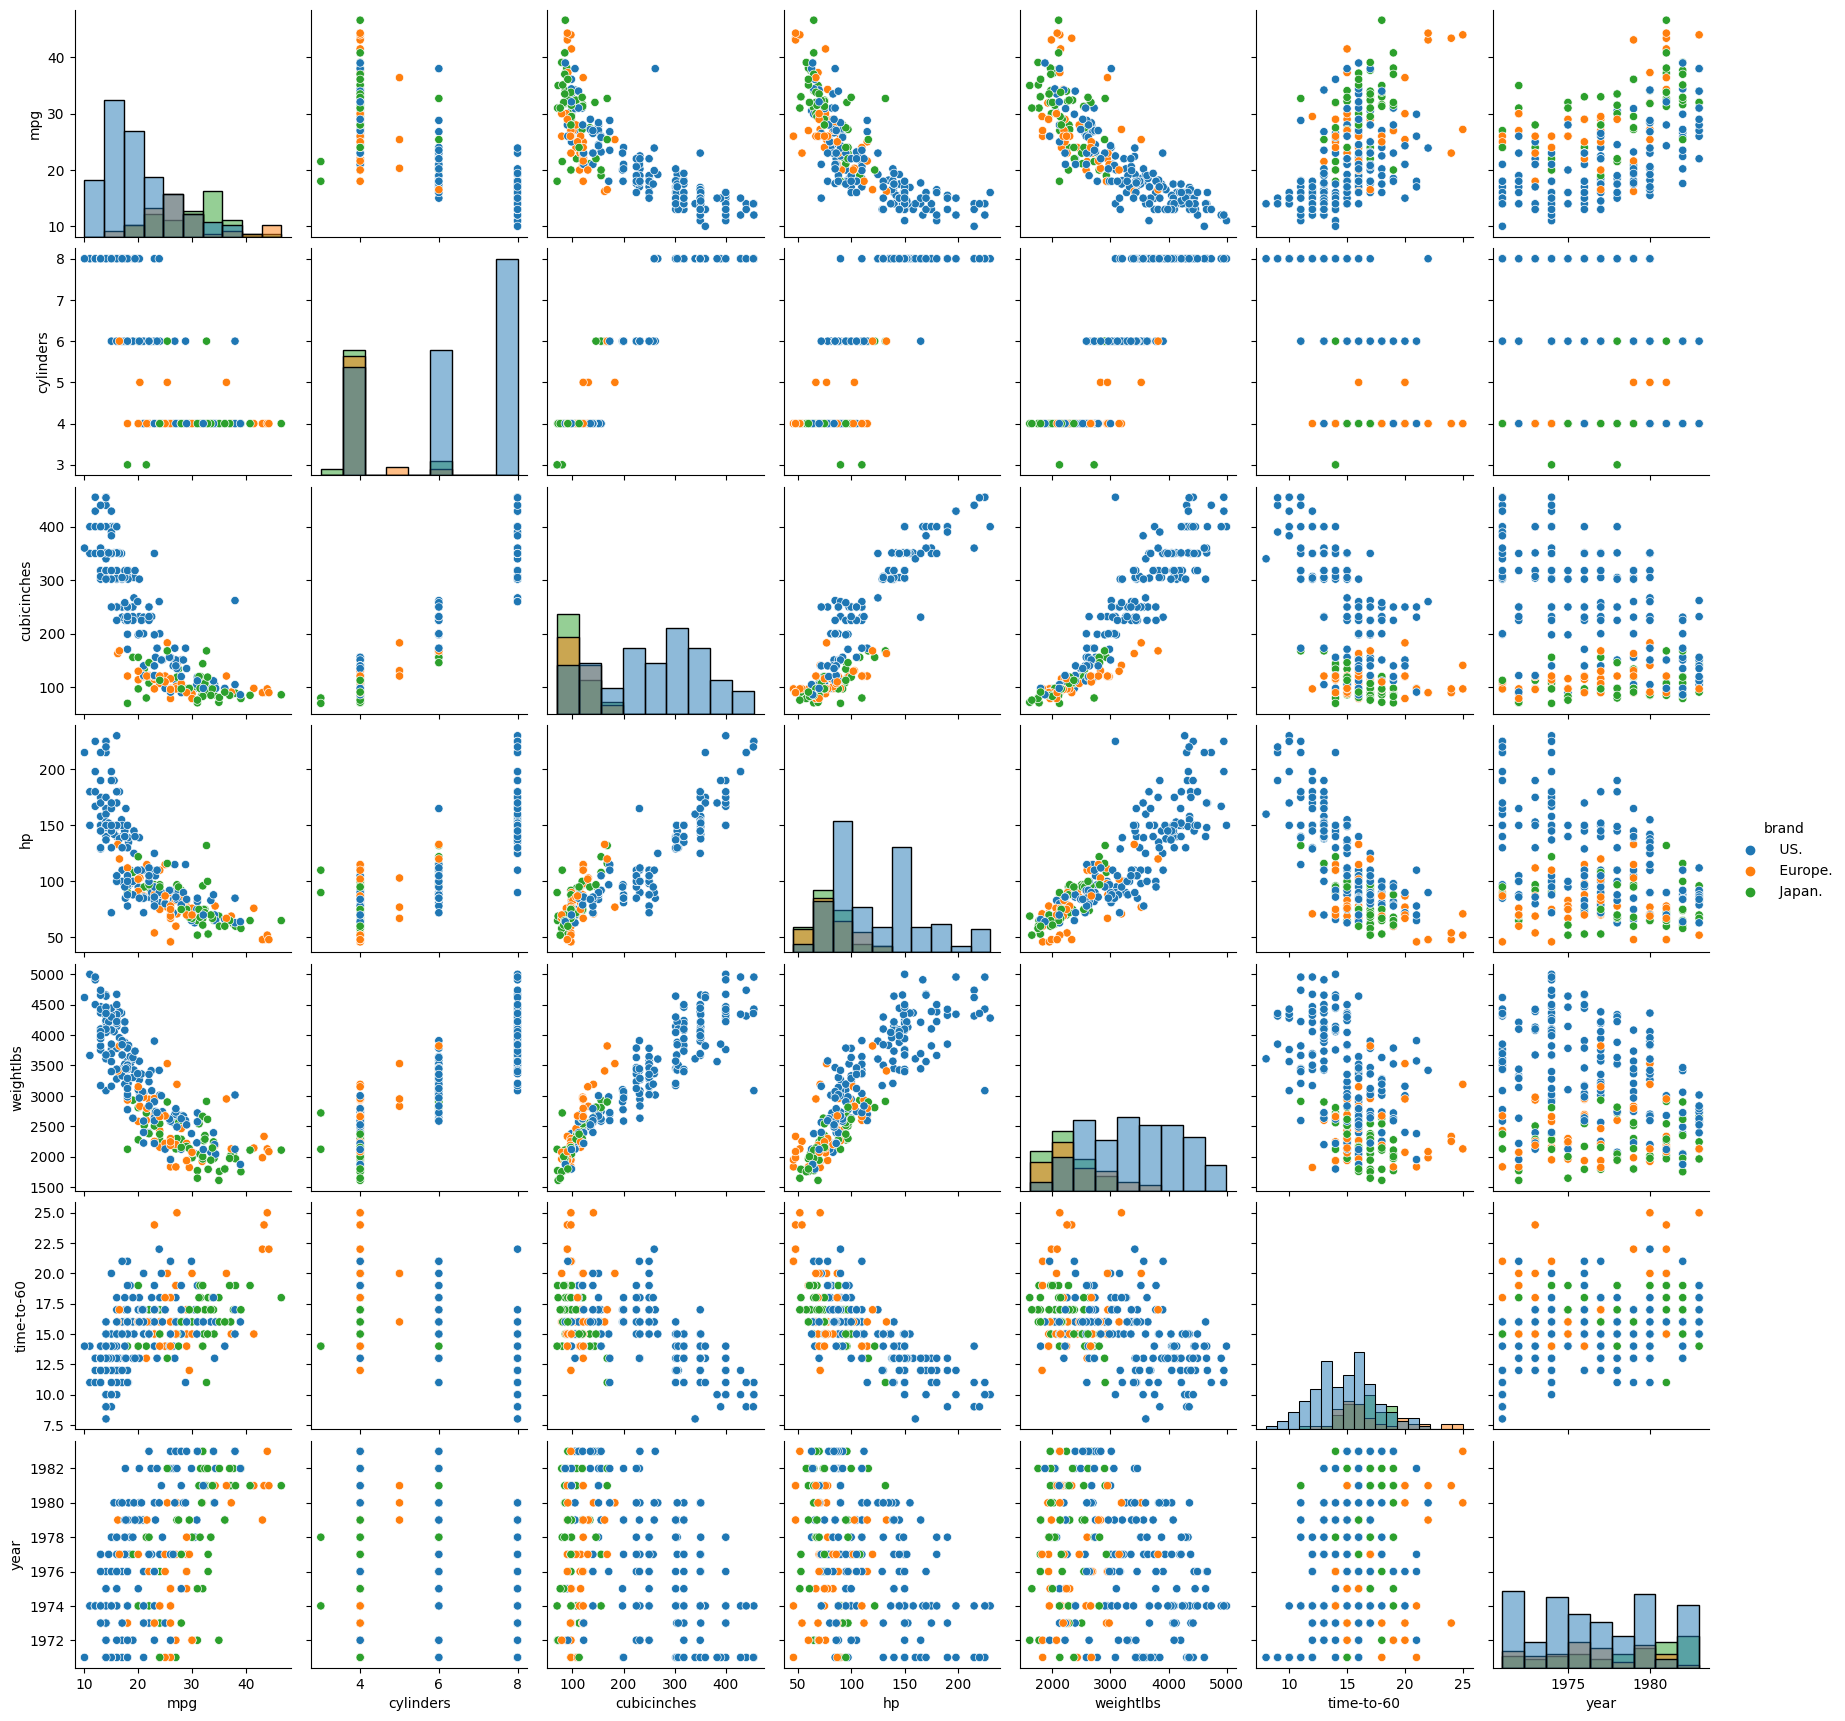

In [33]:
data = data_full.drop(columns=['brand'])
# Обучение модели
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

pairgrid = sns.pairplot(data_full, hue='brand', diag_kind='hist')
# Дополнительный слой для центроидов
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
#  Сформируйте в дополнительной таблице новый столбец 'brand' в качестве заглушки
centroids['brand'] = 4
# Построение графика
sns.pairplot(data_full, hue='brand', diag_kind='hist')
pairgrid.data = centroids
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', palette='flag');

### Нужно много цилиндров, чтобы разогнать тяжелые американские машины. Есть смысл разделить этот кластер на два - с большими двигателями, как у японцев, и с очень большими.